# <center>Option Hedging Simulation<center>

<div style="text-align: right;">
    <h2>Yuqian Li</h2>
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Problem 1

### <span style="color:blue">1. Simulation of Brownian Motion Paths (5 pts)</span>

<span style="color:blue">__(a) Write a function that simulate paths of Brownian Motion.__</span>

<span style="color:blue">__(b) For 10k paths, estimate the average $E(W_{t})$ at each time step, as well as the standard
deviation $\sqrt{Var(W_{t})}$ from the Brownian paths.__</span>

<span style="color:blue">__(c) Plot the results along with theoretical values for $E(W_{t})$ and $\sqrt{Var(W_{t})}$__.</span>

#### Solution:

In [326]:
def BMGenerate(T):
    # T in year
    N = 252  # BUS
    step = T/N

    # (a) Simulate paths of Brownian Motion.
    paths = []
    for i in range(10000):
        dw = np.random.normal(0, np.sqrt(step), N)
        w = np.cumsum(dw)
        zero_w = np.insert(w,0,[0]) # Brownian Motion is 0 at t0
        paths.append(zero_w) 
    
    # For 10k paths, estimate the average $E(W_{t})$ at each time step, 
    # as well as the standard deviation $\sqrt{Var(W_{t})}$ from the Brownian paths.
    df = pd.DataFrame(paths)
    mean_row = df.mean()
    std_row = df.std()
    print("E(Wt)=", mean_row)
    print("SD(Wt)=", std_row)
    
    t = [i/N for i in range(0, N+1)]
    
    # Plot graph of a BM path
    fig = plt.figure(figsize=(7, 5))
    plt.title("A Brownian Motion Path",fontsize = 16)
    plt.xlabel("Time", fontsize = 12)
    plt.ylabel("BM Value", fontsize = 12)
    plt.plot(t, paths[0],'b-',label = 'Simulated Brownian Motion Path')
    plt.legend(loc='upper right', fontsize = 12)
    plt.grid()
    plt.show()

    # (c) Plot the results along with theoretical values for $E(W_{t})$ and $\sqrt{Var(W_{t})}$__.
    fig = plt.figure(figsize=(7, 5))
    plt.title("The Average and Standard Deviation of Brownian Motion",fontsize = 16)
    plt.xlabel("time", fontsize = 14)
    l1 = plt.plot(t, mean_row,color='orange',label = 'Simulated $E(W_{t})$')
    l2 = plt.plot(t, std_row,'g-',label = 'Simulated $\sqrt{Var(W_{t})}$')
    l3 = plt.plot(t, np.zeros(253),'r', linestyle = '--', label = 'Theoretical $E(W_{t})$')
    l4 = plt.plot(t,np.sqrt(t),'b',linestyle = '--', label = 'Theoretical $\sqrt{Var(W_{t})}$')
    plt.legend(loc='best', fontsize = 12)
    plt.grid()
    plt.show()
    
    return df

E(Wt)= 0      0.000000
1     -0.000268
2      0.000062
3      0.000775
4      0.000800
         ...   
248    0.001450
249    0.001567
250    0.001624
251    0.002307
252    0.002169
Length: 253, dtype: float64
SD(Wt)= 0      0.000000
1      0.063515
2      0.089984
3      0.110315
4      0.126475
         ...   
248    0.991571
249    0.993045
250    0.994633
251    0.996825
252    0.996825
Length: 253, dtype: float64


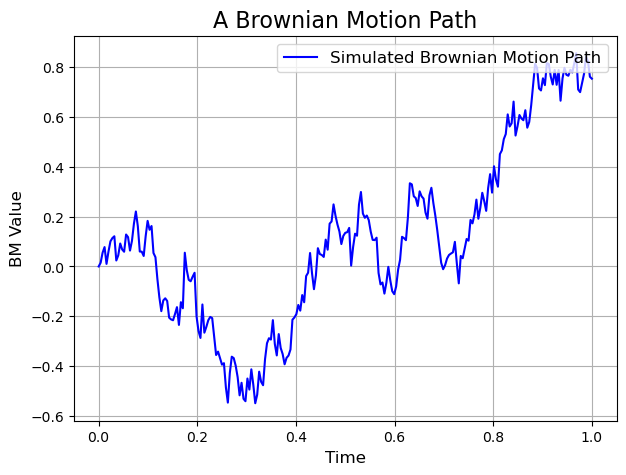

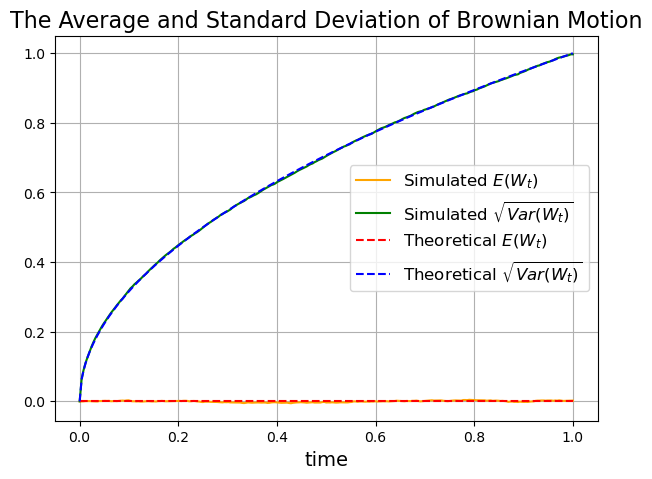

,0,1,2,3,4,5,6,7,8,9,...,243,244,245,246,247,248,249,250,251,252
0,0.0,0.015183,0.055407,0.077837,0.010349,0.059605,0.100780,0.113909,0.121174,0.023969,...,0.814518,0.855612,0.710005,0.699411,0.737060,0.773110,0.841400,0.823964,0.761209,0.753441
1,0.0,0.025275,-0.093558,-0.087816,-0.115141,-0.179055,-0.237812,-0.344978,-0.305111,-0.244136,...,-0.631192,-0.633102,-0.564770,-0.596108,-0.584239,-0.571659,-0.657612,-0.644094,-0.639065,-0.582904
2,0.0,0.109826,0.208190,0.235052,0.244146,0.248443,0.264036,0.415570,0.392678,0.413796,...,0.858992,0.831738,0.807020,0.732483,0.726311,0.682120,0.582133,0.531468,0.482281,0.492309
3,0.0,0.087406,0.062380,0.127155,0.111142,0.093811,-0.018973,0.018126,0.050077,0.034707,...,0.195594,0.163211,0.176512,0.101574,0.096415,0.153208,0.071742,0.110686,0.094111,0.078059
4,0.0,0.035641,0.147117,0.141539,0.193472,0.117399,0.229078,0.210290,0.096263,-0.041499,...,0.979151,1.050768,1.126195,1.105199,1.066976,1.144112,1.030405,1.000645,1.004720,0.994169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,-0.058679,-0.045090,0.020067,0.034120,0.122754,0.105912,0.084989,0.031254,0.067483,...,0.528632,0.502417,0.420723,0.486747,0.378642,0.440182,0.419786,0.403514,0.384563,0.395396
9996,0.0,0.067171,0.076895,0.084791,0.083919,0.092312,-0.002609,-0.017889,0.013426,0.097198,...,0.366368,0.370114,0.312665,0.310312,0.311086,0.490634,0.489906,0.512806,0.571759,0.512039
9997,0.0,0.056293,0.066612,0.042545,0.076669,0.005430,0.056585,0.044321,0.118532,0.022615,...,0.998907,0.980100,0.963198,0.959062,0.905530,0.917886,1.022668,1.105978,1.136522,1.176487
9998,0.0,0.017384,-0.024122,-0.029156,-0.025621,-0.009313,0.071544,0.100498,0.102262,0.062170,...,0.249593,0.295400,0.322087,0.383016,0.321930,0.337164,0.312998,0.247504,0.250657,0.251058


In [263]:
BMGenerate(1)

# Problem 2

### <span style="color:blue">2. Simulation of Black-Scholes Paths (5 pts)</span>

<span style="color:blue">We assume a Black-Scholes underlying with $dS_{t} = µS_{t}dt + σS_{t}dW_{t}$. As a baseline, we
assume $S_{0} = 100$, $\mu = 3\%$, $r = 5\%$, $\sigma = 25\%$</span>

<span style="color:blue">To simulate the underlying $S_{t}$ we notice that
$S_{t_{i+1}}$ = $S_{t_{i}}e^{(\mu−\frac{1}{2}\sigma^2)(t_{i+1}−t_{i})+\sigma(W_{t_{i+1}}−W_{t_{i}})}$= $S_{t_{i}}e^{(\mu−\frac{1}{2}\sigma^2)\delta t+\sigma \sqrt{\delta t}Z_{i+1}}$</span>

<span style="color:blue">Repeat the previous question but on $S_{t}$ this time.</span>

#### Solution:

In [264]:
def SGenerate(T,S0,mu,r,sigma):
    N = 252  # BUS
    step = T/N

    paths = []
    for i in range(10000):
        S = S0
        Spath = [S0]
        for j in range(N):
            dw = np.random.normal(0, np.sqrt(step), 1)[0]
            S = S*np.exp((mu-0.5*sigma**2)*step+sigma*dw)
            Spath.append(S)
        paths.append(Spath) 
    
    df = pd.DataFrame(paths)
    mean_row = df.mean()
    std_row = df.std()
    print("E(St)=", mean_row)
    print("SD(St)=", std_row)
    
    t = [i/N for i in range(0, N+1)]
    
    # Plot graph of a Stock price path
    fig = plt.figure(figsize=(7, 5))
    plt.title("A Stock Price Path",fontsize = 16)
    plt.xlabel("Time", fontsize = 12)
    plt.ylabel("Stock Price", fontsize = 12)
    plt.plot(t, paths[0],'b-',label = 'Simulated Geometric Brownian Motion Path')
    plt.legend(loc='upper right', fontsize = 12)
    plt.grid()
    plt.show()

    
    fig = plt.figure(figsize=(7, 5))
    plt.title("The Average and Standard Deviation of Geometric Brownian Motion",fontsize = 16)
    plt.xlabel("time", fontsize = 14)
    l1 = plt.plot(t, mean_row,color='orange',label = 'Simulated $E(S_{t})$')
    l2 = plt.plot(t, std_row,'g-',label = 'Simulated $\sqrt{Var(S_{t})}$')
    TheoE = [S0*np.exp(mu*time) for time in t]
    TheoSD = [np.sqrt(S0**2*np.exp(2*mu*time)*(np.exp(sigma**2*time)-1)) for time in t]
    l3 = plt.plot(t, TheoE,'r',linestyle = '--', label = 'Theoretical $E(S_{t})$')
    l4 = plt.plot(t, TheoSD,'b',linestyle = '--',label = 'Theoretical $\sqrt{Var(S_{t})}$')
    plt.legend(loc='best', fontsize = 12)
    plt.grid()
    plt.show()
    
    return df

E(St)= 0      100.000000
1      100.031211
2      100.038056
3      100.035049
4      100.070911
          ...    
248    102.606197
249    102.597156
250    102.606141
251    102.625402
252    102.613270
Length: 253, dtype: float64
SD(St)= 0       0.000000
1       1.590853
2       2.247210
3       2.765364
4       3.167267
         ...    
248    25.648729
249    25.700860
250    25.780992
251    25.861531
252    25.910572
Length: 253, dtype: float64


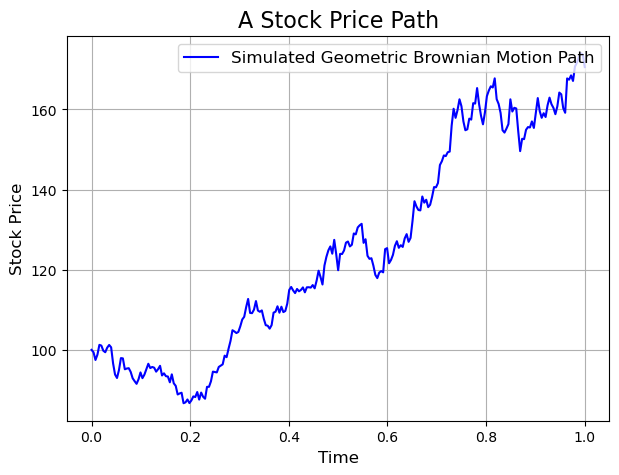

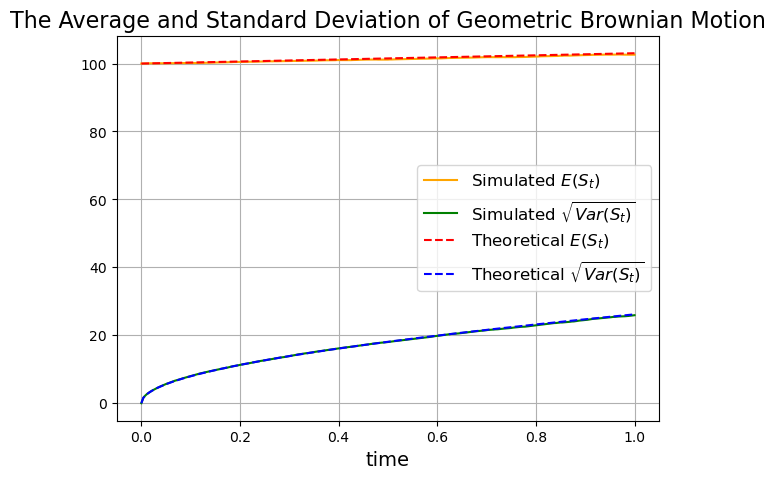

,0,1,2,3,4,5,6,7,8,9,...,243,244,245,246,247,248,249,250,251,252
0,100,99.393087,97.475430,98.798918,101.249870,101.066438,99.792520,99.402036,100.555502,101.225731,...,167.733277,167.422783,168.496283,167.109948,170.693833,171.684761,173.077569,174.027054,173.676850,170.568830
1,100,103.278481,100.875051,103.244071,105.157269,105.460527,106.553250,107.129439,107.828628,109.758664,...,104.691587,108.404812,105.984500,108.482669,107.814382,108.405415,108.923280,110.174376,105.841251,106.354726
2,100,101.848516,103.183054,100.580608,102.446320,101.779085,103.387058,101.848885,102.785512,102.663763,...,106.391767,106.196724,106.102571,105.612958,104.935660,105.338780,107.866689,103.641655,101.357873,102.023730
3,100,98.003707,98.318355,97.672231,97.540741,98.871487,95.339879,96.582722,95.143013,96.618934,...,98.747981,98.019872,101.490068,102.919793,102.904525,104.450315,103.121837,103.492093,106.664103,107.302144
4,100,98.916539,97.509423,95.694871,94.878513,96.798397,96.213238,96.640641,98.199063,97.226200,...,121.086351,119.815661,120.981761,123.437847,123.940639,121.012031,119.561228,119.177782,119.731085,116.013124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,100,103.690763,104.793702,103.585216,108.063255,109.025147,110.383771,108.363216,108.859680,110.107308,...,141.910790,142.582575,143.651319,144.018695,143.236277,146.118705,148.657468,148.602960,149.009425,150.252237
9996,100,101.072050,98.688262,97.166380,95.140798,96.298853,98.293695,97.820170,97.520646,96.861549,...,82.680900,84.277809,87.118595,85.068693,85.185339,86.514825,86.264761,87.275793,85.231750,85.754563
9997,100,101.402829,100.972862,100.950166,101.285447,99.206009,99.860113,99.705046,100.030373,100.644633,...,117.874282,115.413589,113.973978,113.199818,112.786105,110.424390,114.024252,117.222465,116.227386,118.002221
9998,100,99.596517,101.320879,101.000616,101.764866,104.543098,105.191914,105.593413,107.105194,108.306886,...,126.244503,124.498787,126.551399,127.814921,124.924031,126.173637,125.274078,124.528215,128.253144,128.368725


In [265]:
SGenerate(1,100,0.03,0.05,0.25)

# Problem 3

### <span style="color:blue">3. Simulation of Hedging (30 pts)</span>

<span style="color:blue">We consider to be short a call option with strike $K = S_{0}$ with expiry $T = 1Y$ .</span>

#### <span style="color:blue">(a) Simulate (daily) values for the hedging portfolio $P_{t} = \Delta_{t}S_{t} + \varphi_{t}B_{y}$. Explain in details how you perform the simulation.</span>

#### Solution:

__First, figure out the initial values of $P_{0}$__ by:

$$P_{0} = C_{bs}(0, S_{0}, K, r, \sigma, T)$$

This is because at time $0$, we short the call option, get the option premium, and use this amount of money to construct the hedging portfolio. So the value of the hedging portfolio should be equal to the value of the call option at time $0$.

Given that $S_{0}=K=100$, $r = 5\%$, $\sigma = 25\%$, using the call option premium function $C_{bs}$:

According to Black-Scholes model, $C_{bs}(t, S_{t}, K, r, \sigma, T) = S_{t}\Phi(d_{1,t})-Ke^{-r(T-t)}\Phi(d_{2,t})$, where $\Phi$ is the cumulative distribution function (CDF) of standard normal distribution $N(0,1)$, and $d_{1,t}=\frac{ln(\frac{S_{t}}{K})+(r+\frac{\sigma^2}{2})(T-t)}{\sigma\sqrt{T-t}}$. $d_{2,t}=\frac{ln(\frac{S_{t}}{K})+(r-\frac{\sigma^2}{2})(T-t)}{\sigma\sqrt{T-t}} = d_{1,t}-\sigma \sqrt{T-t}$

In [2]:
def Cbs(t,St,K,r,sigma,T):
    d1t = (np.log(St/K)+(r+sigma**2/2)*(T-t))/(sigma*np.sqrt(T-t))
    d2t = (np.log(St/K)+(r-sigma**2/2)*(T-t))/(sigma*np.sqrt(T-t))
    premium = St*norm.cdf(d1t)-K*np.exp(-r*(T-t))*norm.cdf(d2t)
    return premium

In [319]:
P0 = Cbs(0,100,100,0.05,0.25,1)
print('P0 =', P0)

P0 = 12.335998930368717


__Second, figure out the trajectory of $P$ by differential equation.__

According to Lecture 7, since our portfolio is self-financed, it evolves as:

$$dP_{t} = \Delta_{t}dS_{t}+\varphi_{t}dB_{t} = rP_{t}dt+\Delta_{t}(dS_{t}-rS_{t}dt)$$

In this fomula, parameters are determined by following formula: 

$dS_{t}$: According to the assumption that $S_{t}$ obeys Geometric Brownian Motion,

$$dS_{t} = \mu S_{t} dt + \sigma S_{t} dW_{t}$$

$S_{t}$: According to the solution of the above differential equation,

$$S_{t_{i+1}}= S_{t_{i}}e^{(\mu−\frac{1}{2}\sigma^2)(t_{i+1}−t_{i})+\sigma(W_{t_{i+1}}−W_{t_{i}})}= S_{t_{i}}e^{(\mu−\frac{1}{2}\sigma^2)\delta t+\sigma \sqrt{\delta t}Z_{i+1}}$$

$\Delta_{t}:$ According to Black-Scholes Model,

$$\Delta_{t} = \Phi(d_{1,t})$$

where

$$d_{1,t}=\frac{ln(\frac{S_{t}}{K})+(r+\frac{\sigma^2}{2})(T-t)}{\sigma\sqrt{T-t}}$$

In [269]:
def PGenerate(P0,T,N,S0,K,mu,r,sigma):
    step = T/N
    
    St = S0
    Pt = P0
    Ppath = [P0]
    Cpath = []
    for j in range(N):
        t = j/N
        dWt = np.random.normal(0, np.sqrt(step), 1)[0]
        dSt = mu*St*step+sigma*St*dWt
        d1t = (np.log(St/K)+(r+sigma**2/2)*(T-t))/(sigma*np.sqrt(T-t))
        d2t = (np.log(St/K)+(r-sigma**2/2)*(T-t))/(sigma*np.sqrt(T-t))
        Deltat = norm.cdf(d1t)
        Cbst = St*norm.cdf(d1t)-K*np.exp(-r*(T-t))*norm.cdf(d2t)
        Cpath.append(Cbst)
        dPt = r*Pt*step+Deltat*(dSt-r*St*step)
        Pt += dPt
        St += dSt
        Ppath.append(Pt)
    
    Cpath.append(max(St-K,0))
    error = Ppath[-1]-Cpath[-1]
    return [Ppath,Cpath,error]

Generate a hedging portfolio value path Ppath1 and plot it for visualization.

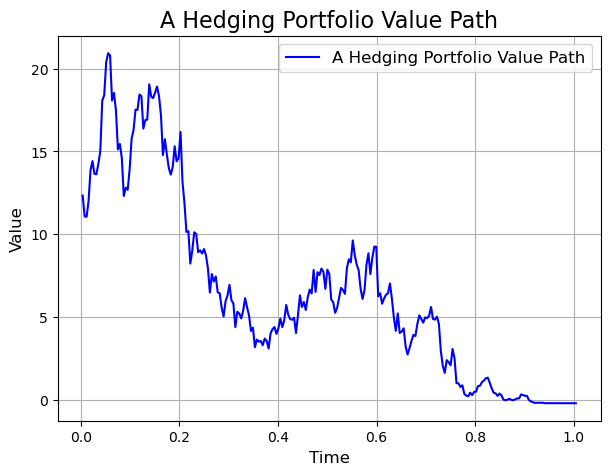

In [270]:
times = [(i+1)/N for i in range(N+1)]
Ppath1 = PGenerate(P0,1,252,100,100,0.03,0.05,0.25)[0]
    
# Plot graph of a Hedging Portfolio value path
fig = plt.figure(figsize=(7, 5))
plt.title("A Hedging Portfolio Value Path",fontsize = 16)
plt.xlabel("Time", fontsize = 12)
plt.ylabel("Value", fontsize = 12)
plt.plot(times,Ppath1,'b-',label = 'A Hedging Portfolio Value Path')
plt.legend(loc='upper right', fontsize = 12)
plt.grid()
plt.show()

#### <span style="color:blue">(b) Plot paths (daily time steps) of the portfolio compared to the theoretical value $C_{bs}(t, S_{t}, K, r, \sigma, T)$ for a few paths. What do you observe?</span>

#### Solution:

Generate 3 hedging portfolio value paths and 3 corresponding theoretical $Cbs$ path, and plot them for visualization.

I plot 3 sets of paths, making sure that the lines are clear and readable. Drawing more sets are techinically feasible of course, but lines may be messy.

__Be careful__: we should use the same list of randomness ($dW_{t}$), i.e. one call of the function PGenerate, to generate the corresponding hedging portfolio value path and theoretical $C_{bs}$ path.

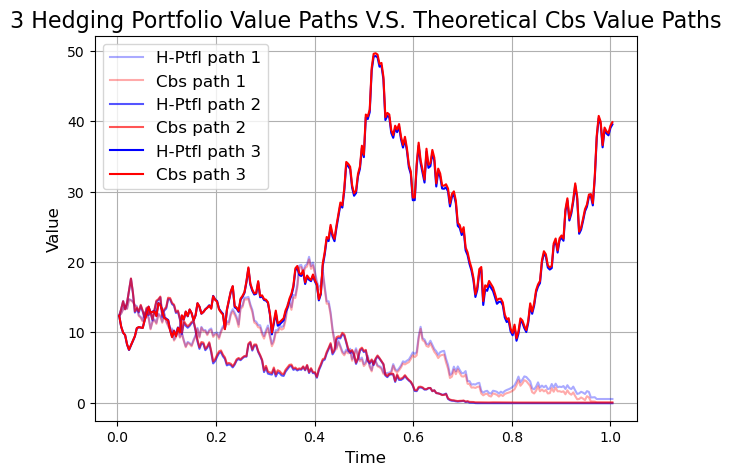

In [273]:
# Plot graph of 3 Hedging Portfolio value paths and 3 corresponding Theoretical Cbs Value Paths
fig = plt.figure(figsize=(7, 5))
plt.title("3 Hedging Portfolio Value Paths V.S. Theoretical Cbs Value Paths",fontsize = 16)
plt.xlabel("Time", fontsize = 12)
plt.ylabel("Value", fontsize = 12)

# Generate 3 sets of paths
#Ppaths = []
#Cpaths = []
for i in range(3):
    a = PGenerate(P0,1,252,100,100,0.03,0.05,0.25)
    #Ppaths.append(a[0])
    #Cpaths.append(a[1])
    plt.plot(times,a[0],'b-', alpha = (i+1)/3, label = 'H-Ptfl path %s' %str(i+1))
    plt.plot(times,a[1],'r-', alpha = (i+1)/3, label = 'Cbs path %s' %str(i+1))

plt.legend(loc='best', fontsize = 12)
plt.grid()
plt.show()

I also simulate 1000 paths of hedging portfolio value and theoretical $Cbs$ each, figure out their mean (representing average effect), and compare the 2 mean paths.

Actually, we can use more paths like 10k, but limited by my CPU's quality, I only run 1k simulations.

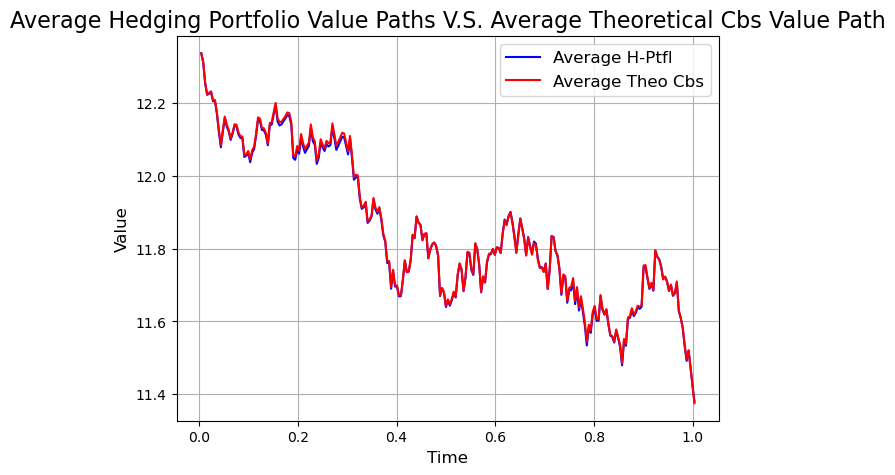

In [320]:
Ppaths = [] # Hedging Portfolio Value Paths
Cpaths = [] # Theoretical Cbs Value Paths
Epaths = [] # Hedging Errors 
for i in range(1000):
    a = PGenerate(P0,1,252,100,100,0.03,0.05,0.25)
    Ppaths.append(a[0]) 
    Cpaths.append(a[1])
    Epaths.append(a[-1])
dfP = pd.DataFrame(Ppaths)
dfC = pd.DataFrame(Cpaths)
mean_Ppaths = dfP.mean()
mean_Cpaths = dfC.mean()
#std_row = df.std()
#print("E(Wt)=", mean_row)
#print("SD(Wt)=", std_row)

# Plot graph of average Hedging Portfolio value paths and average Theoretical Cbs Value Paths
fig = plt.figure(figsize=(7, 5))
plt.title("Average Hedging Portfolio Value Paths V.S. Average Theoretical Cbs Value Path",fontsize = 16)
plt.xlabel("Time", fontsize = 12)
plt.ylabel("Value", fontsize = 12)
plt.plot(times,mean_Ppaths,'b-',label = 'Average H-Ptfl')
plt.plot(times,mean_Cpaths,'r-',label = 'Average Theo Cbs')
plt.legend(loc='best', fontsize = 12)
plt.grid()
plt.show()

#### <span style="color:blue">(c) Plot histogram of the hedging error $\epsilon_{T} = P_{T} − (S_{T} − K)^{+}$. Display $E(\epsilon_{T})$ and $\sqrt{Var(\epsilon_{T})}$ in the title of the each plot.</span>

#### Solution:

Use Epaths (Hedging Errors) generated by the above 1000 simulations.

In [321]:
# Daily
d_mean = np.mean(Epaths)
d_std = np.std(Epaths)
print("Error Daily: mean = ", d_mean, 'standard deviation = ', d_std)

Error Daily: mean =  0.004670863504763011 standard deviation =  0.5520835669546614


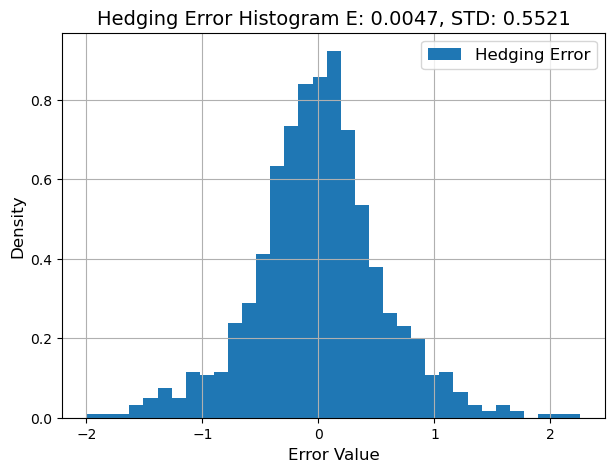

In [322]:
# Plot histogram of Hedging Error
fig = plt.figure(figsize=(7, 5))
plt.title("Hedging Error Histogram E: {:.4f}, STD: {:.4f}".format(d_mean, d_std),fontsize = 14)
plt.xlabel("Error Value", fontsize = 12)
plt.ylabel("Density", fontsize = 12)
plt.hist(Epaths, density=True, bins='auto', histtype='stepfilled', alpha=1, label = "Hedging Error")
plt.legend(loc='best', fontsize = 12)
plt.grid()
plt.show()

# Problem 4

#### <span style="color:blue">4. Behavior of Hedging error (30 pts)</span>

<span style="color:blue">We want to observe how $\epsilon_{T}$ behave as we increase $\mu$ gradually from $3\%$ to $20\%$ and
decreases the number of time step to weekly $\delta t = 1/52$ or biweekly $\delta t = 1/26$. We
also want to understand the effect of the volatility $\sigma$ and we increases it gradually to
$\sigma = 80\%$.</span>

#### <span style="color:blue">(a) Show how the histogram of $\epsilon_{T}$ changes as $dt$, $\mu$ and $\sigma$ increase.</span>

#### Solution:

### 1. $dt$ increases (daily 1/252 -> weekly 1/52 -> biweekly 1/26).

Increase $d_{t}$ from 1/252, to 1/52, and finally 1/26, while controlling all the other parameters to be default values.

In [323]:
# Weekly
w_Epaths = [] # Hedging Errors
for i in range(1000):
    a = PGenerate(P0,1,52,100,100,0.03,0.05,0.25)
    w_Epaths.append(a[-1])

# Biweekly
b_Epaths = [] # Hedging Errors
for i in range(1000):
    a = PGenerate(P0,1,26,100,100,0.03,0.05,0.25)
    b_Epaths.append(a[-1])

In [324]:
# Weekly
w_mean = np.mean(w_Epaths)
w_std = np.std(w_Epaths)
print("Error Weekly: mean = ", w_mean, 'standard deviation = ', w_std)

# Biweekly
b_mean = np.mean(b_Epaths)
b_std = np.std(b_Epaths)
print("Error Biweekly: mean = ", b_mean, 'standard deviation = ', b_std)

Error Weekly: mean =  0.003219839021598462 standard deviation =  1.1144742732773487
Error Biweekly: mean =  -0.12008220647863797 standard deviation =  1.7822822307121462


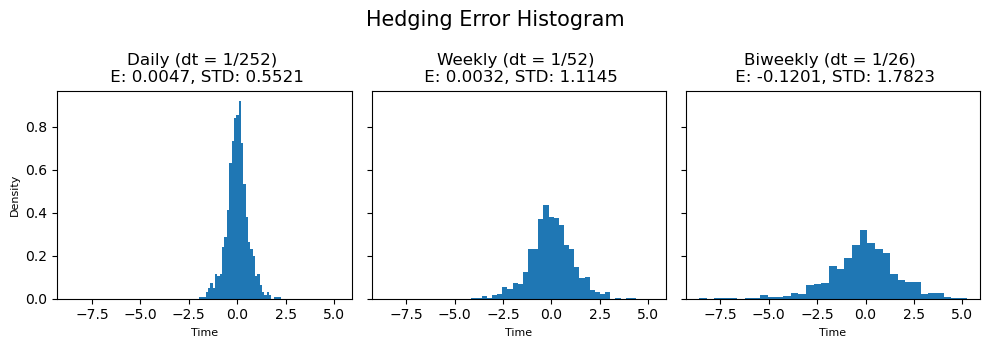

In [325]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5), sharex=True, sharey=True)
fig.suptitle('Hedging Error Histogram', fontsize=15)

# Daily
ax = axes[0]
ax.set_title("Daily (dt = 1/252) \n E: {:.4f}, STD: {:.4f}".format(d_mean, d_std))
ax.set_xlabel("Time", fontsize = 8)
ax.set_ylabel("Density", fontsize = 8)
ax.hist(Epaths, density=True, bins='auto', histtype='stepfilled', alpha=1)

# Weekly
ax = axes[1]
ax.set_title("Weekly (dt = 1/52) \n E: {:.4f}, STD: {:.4f}".format(w_mean, w_std))
ax.set_xlabel("Time", fontsize = 8)
ax.hist(w_Epaths, density=True, bins='auto', histtype='stepfilled', alpha=1)

# Biweekly
ax = axes[2]
ax.set_title("Biweekly (dt = 1/26) \n E: {:.4f}, STD: {:.4f}".format(b_mean, b_std))
ax.set_xlabel("Time", fontsize = 8)
ax.hist(b_Epaths, density=True, bins='auto', histtype='stepfilled', alpha=1)

plt.tight_layout()
plt.show()

### 2. $\mu$ increases (from 0.03 to 0.20, i.e. in 0.01*range(3,21)).

Increase $\mu$ from 0.03 to 0.20, i.e. in 0.01*range(3,21), while controlling all the other parameters to be default values.

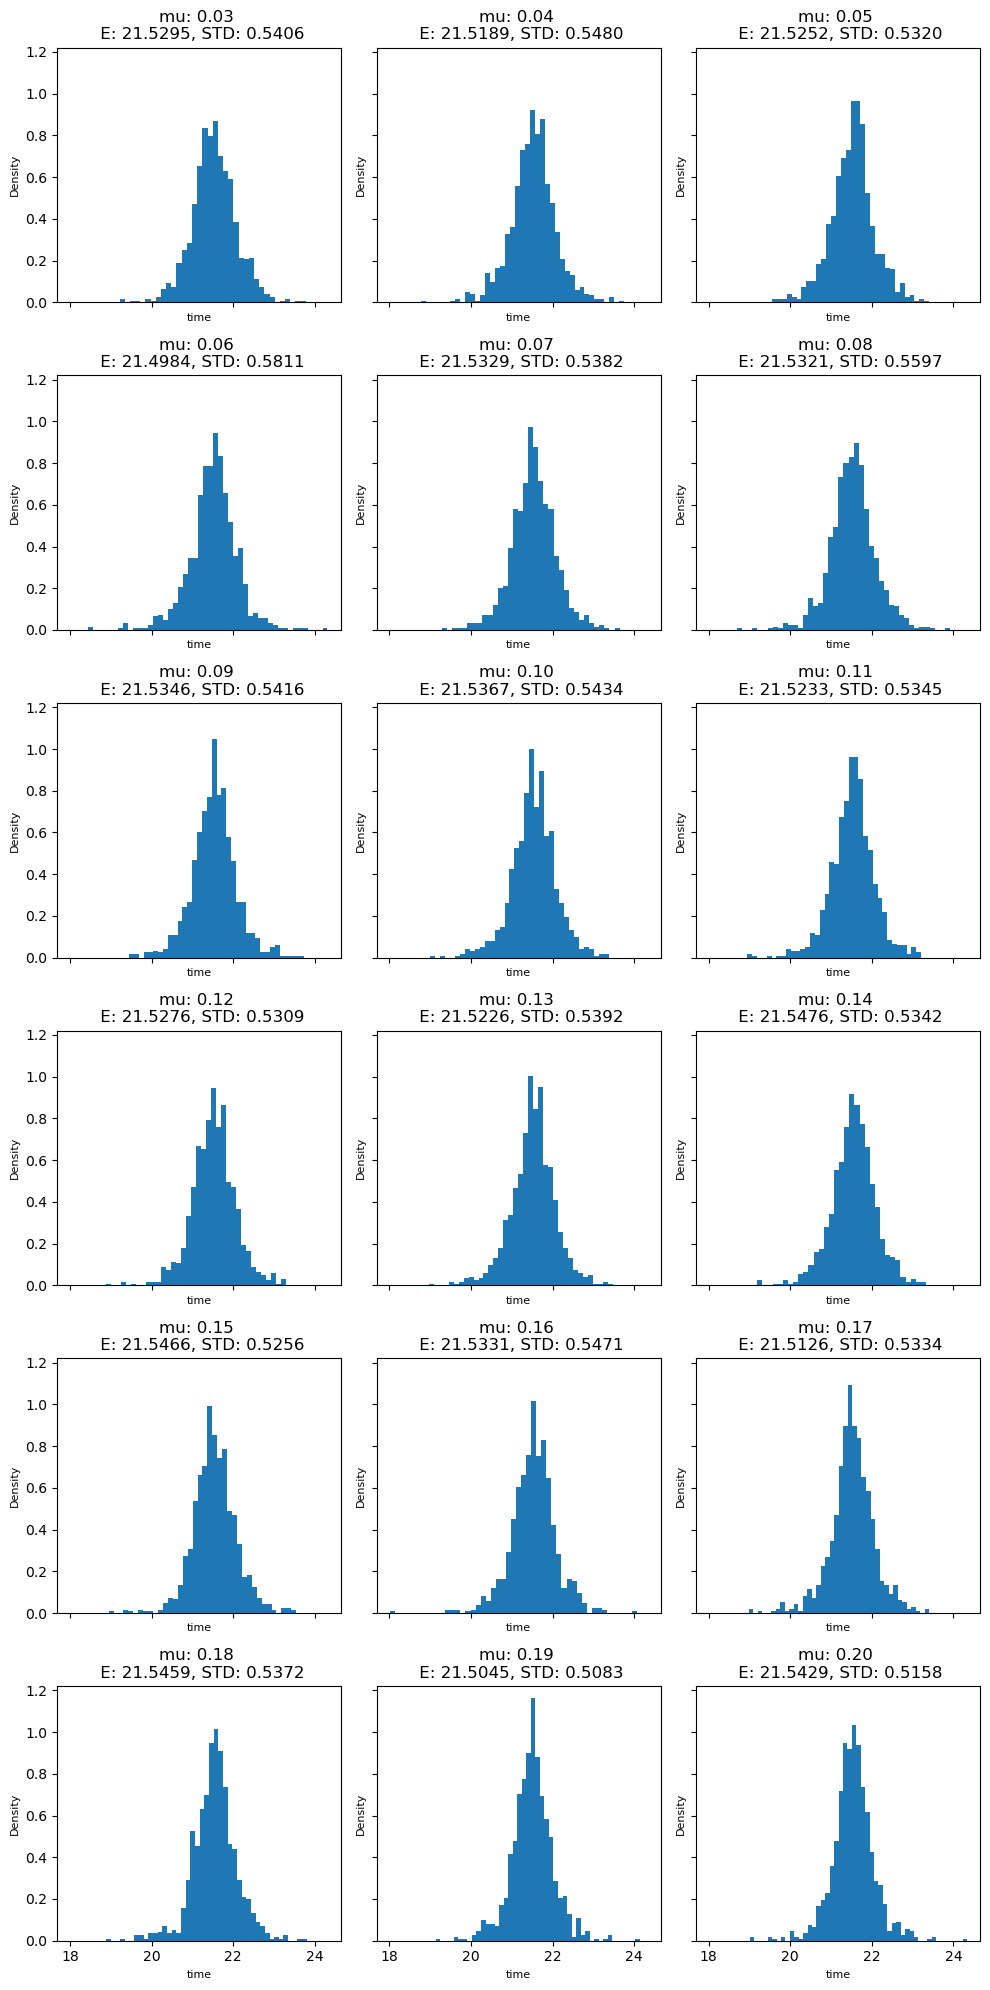

In [314]:
%matplotlib inline
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(10, 20), sharex=True, sharey=True)
#fig.suptitle('Hedging Error Histogram', fontsize=15)
#plt.subplots_adjust(top=0.8)

for j in range(18):
    mu = (3+j)/100
    Epaths = []
    for i in range(1000):
        a = PGenerate(P0,1,252,100,100,mu,0.05,0.25)
        Epaths.append(a[-1])
    d_mean = np.mean(Epaths)
    d_std = np.std(Epaths)
    ax = axes[j//3,j%3]
    ax.set_title("mu: {:.2f} \n E: {:.4f}, STD: {:.4f}".format(mu, d_mean, d_std))
    ax.set_xlabel("time", fontsize = 8)
    ax.set_ylabel("Density", fontsize = 8)
    ax.hist(Epaths, density=True, bins='auto', histtype='stepfilled', alpha=1)

plt.tight_layout()
plt.show()

### 3. $\sigma$ increases from 0.25 to 0.80, i.e. in 0.01*(25+5*range(12)).

Increase $\sigma$ from 0.25 to 0.80, i.e. in 0.01*(25+5*range(12)), while controlling all the other parameters to be default values.

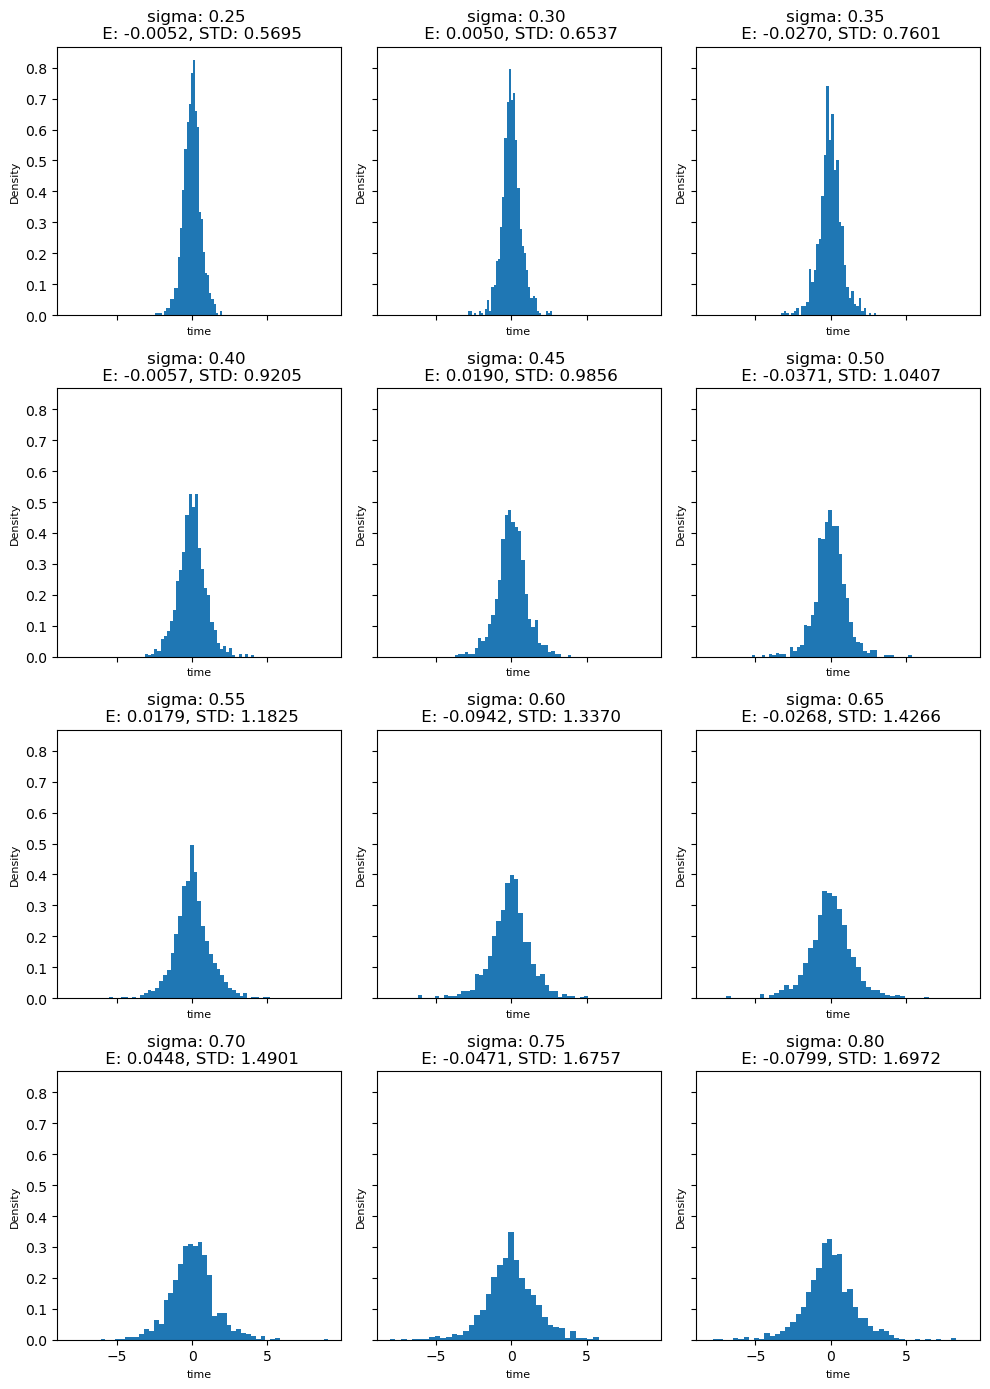

In [328]:
%matplotlib inline
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 14), sharex=True, sharey=True)
#fig.suptitle('Hedging Error Histogram', fontsize=15)
#plt.subplots_adjust(top=0.8)

for j in range(12):
    sigma = (25+j*5)/100
    Epaths = []
    for i in range(1000):
        P0 = Cbs(0,100,100,0.05,sigma,1) 
        a = PGenerate(P0,1,252,100,100,0.03,0.05,sigma)
        Epaths.append(a[-1])
    d_mean = np.mean(Epaths)
    d_std = np.std(Epaths)
    ax = axes[j//3,j%3]
    ax.set_title("sigma: {:.2f} \n E: {:.4f}, STD: {:.4f}".format(sigma, d_mean, d_std))
    ax.set_xlabel("time", fontsize = 8)
    ax.set_ylabel("Density", fontsize = 8)
    ax.hist(Epaths, density=True, bins='auto', histtype='stepfilled', alpha=1)

plt.tight_layout()
plt.show()

#### <span style="color:blue">(b) Comment on your findings.</span>

### Conclusions:

__1. $dt$ increases (daily 1/252 -> weekly 1/52 -> biweekly 1/26).__

As $d_{t}$ increases from 1/252, to 1/52, finally to 1/26, 

$\epsilon_{T}$: __no obvious rule.__

$\sqrt{Var(\epsilon_{T})}$: __increases.__ This is because as $d_{t}$ increases, there are less opportunities for the hedging portfolio to rebalance to fully offset the effect of the call option. So, every simulation is different to a larger extent. Therefore, there is a higher standard deviation in the hedging error.

__2. $\mu$ increases (from 0.03 to 0.20, i.e. in 0.01*range(3,21)).__

As $\mu$ increases from 0.03 to 0.20, i.e. in 0.01*range(3,21),

$\epsilon_{T}$: __almost no change__. This is because $\mu$ represents the expected return of underlying stock, but does not get involved in the Black-Scholes Model. Therefore, it has almost no impact on the call option and hedging portfolio. 

$\sqrt{Var(\epsilon_{T})}$: __almost no change__. Same reason as above.

__3. $\sigma$ increases from 0.25 to 0.80, i.e. in 0.01*(25+5*range(12)).__

As $\sigma$ increases from 0.25 to 0.80, i.e. in 0.01*(25+5*range(12)),

$\epsilon_{T}$:__almost no change__.

$\sqrt{Var(\epsilon_{T})}$: __increases__. This is because $\sigma$ represents the volatility of underlying stock. Larger volatility means larger uncertainty, therefore larger extent of differences between the values of the hedging portfolio and the call option.

# Problem 5

#### <span style="color:blue">5. Estimation of Volatility (30 pts)</span>

<span style="color:blue">Recall that for a diffusion process $dX_{t} = a_{t}dt + b_{t}dW_{t}$, the quadratic variation is
$⟨X⟩_{T} = \lim_{N \to \infty} \sum_{i=1}^{N} (X_{t_{i}} − X_{t_{i−1}})^2 = \int_{0}^{T} b_{t}^2 dt$ where the convergence is a.s.</span>

__<span style="color:blue">(a) In the Black-Scholes model, set $X_{t} = ln(S_{t})$. What is $⟨X⟩_{T}$ ?</span>__

__Solution:__

For a stochastic process $X_{t}$ that meets the diffenrential equation:

$$dX_{t} = a(X_{t},t)dt+\sigma(X_{t},t)dW_{t}$$

according to the $It\hat{o}$'s Lemma, for function $f(X_{t},t)$,

$$df(X_{t},t) = \left[\frac{\partial f(X_{t},t)}{\partial t}+\frac{\partial f(X_{t},t)}{\partial X_{t}}a(X_{t},t)+\frac{1}{2}\frac{\partial^2 f(X_{t},t)}{\partial X_{t}^2}\sigma^2(X_{t},t)\right]dt+\frac{\partial f(X_{t},t)}{\partial X_{t}}\sigma(X_{t},t)dW_{t}$$

Here, for $S_{t}$ that meets:

$$dS_{t} = \mu S_{t} dt + \sigma S_{t} dW_{t}$$

Using $It\hat{o}$'s Lemma, I can get:

$$dln(S_{t})= (\mu−\frac{1}{2}\sigma^2)dt+\sigma dW_{t}$$

According to the given knowledge in the problem, 

$$⟨X⟩_{T} = ⟨ln(S)⟩_{T} = \int_{0}^{T} \sigma^2 dt = \sigma^2 T$$

__<span style="color:blue">(b) For a given path of $S_{t}$, show distinct plots (for a few paths) of $\frac{252}{n} \sum_{i=1}^{n} (X_{t_{i}} −X_{t_{i−1}})^2$ as $n$ increases from 1 to N = 252. What do you observe? This is called the __historical__ volatility.</span>__

__Solution:__

In [416]:
def lnSGenerate(T,N,S0,mu,r,sigma,path_num):
    step = T/N
    
    n = [i for i in range(1, N+1)]
    
    # Set the environment of plotting historical volatility graph
    fig = plt.figure(figsize=(7, 5))
    plt.title("Historical Volatility Path Graph",fontsize = 16)
    plt.xlabel("n", fontsize = 12)
    plt.ylabel("Historical Volatility", fontsize = 12)
    
    for num in range(path_num):
        
        # Simulate the S and ln(S) paths
        S = S0
        lnS = np.log(S0)
        lnSpath = [lnS]
        for j in range(N):
            dw = np.random.normal(0, np.sqrt(step), 1)[0]
            S = S*np.exp((mu-0.5*sigma**2)*step+sigma*dw)
            lnS = np.log(S)
            # Method2: calculate lnS directly
            '''
            dlnS = (mu-sigma**2/2)step+sigma*dw
            lnS += dlnS
            '''
            lnSpath.append(lnS)

        # Calculate the historical volatility arrays
        lnS_diff = np.diff(lnSpath)
        lnS_diff_square = lnS_diff**2 
        lnS_diff_square_partsum = np.cumsum(lnS_diff_square)
        his_vol = [252/i*lnS_diff_square_partsum[i-1] for i in range(1,len(lnS_diff_square_partsum)+1)]
        #dfvol = pd.DataFrame(his_vol)
        
        # Plot this historical volatility paths
        print("Path %s:" %str(num+1), "Final his vol = ", his_vol[-1], "; Final std = ", np.sqrt(his_vol[-1]))
        plt.plot(n, his_vol,'b-', alpha = (num)/6+0.15, label = "His Vol Path %s" %str(num+1))
    
    plt.legend(loc='best', fontsize = 12)
    plt.grid()
    plt.show()
    #return dfvol

Path 1: Final his vol =  0.05733850617226836 ; Final std =  0.23945460148485007
Path 2: Final his vol =  0.06045044994623867 ; Final std =  0.24586673208516574
Path 3: Final his vol =  0.05861297558392896 ; Final std =  0.2421011680763415
Path 4: Final his vol =  0.05517756661389704 ; Final std =  0.23489905622180998
Path 5: Final his vol =  0.05908187324776468 ; Final std =  0.24306763101607065


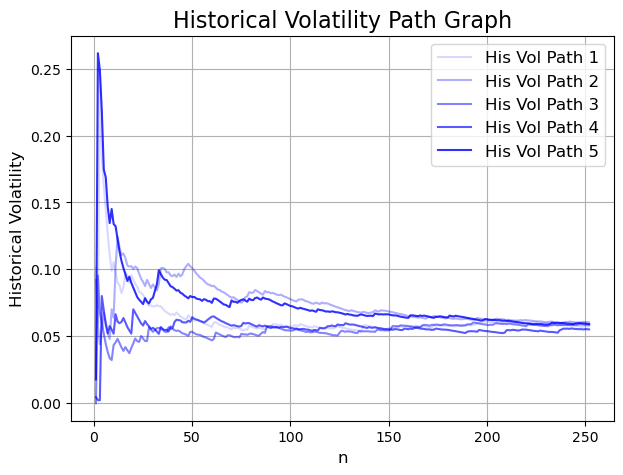

In [417]:
lnSGenerate(1,252,100,0.03,0.05,0.25,5)

### Conclusion:

The historical volalitility converges to the $\sigma^2 = 0.25^2 = 0.0625$. This is reasonable, because we use this $\sigma$ as the standard deviation of stock price to simulate $S_{t}$ path. Therefore the historical volatility calculated from the $S_{t}$ simulating path should be close to $\sigma^2$.

This also accords with the statement in (a) that when $n = 252$ (which is large enough),

$$\frac{252}{n} \sum_{i=1}^{n} (X_{t_{i}} −X_{t_{i−1}})^2 = \frac{252}{252} \sum_{i=1}^{252} (X_{t_{i}} −X_{t_{i−1}})^2 = \lim_{N \to \infty} \sum_{i=1}^{N} (X_{t_{i}} − X_{t_{i−1}})^2 = \int_{0}^{1} b_{t}^2 dt = ⟨X⟩_{1} = \sigma^2 *1$$

where $T=1$.

__<span style="color:blue">(c) For a given path of $S_{t}$, compute the value $\sigma$ that makes the hedging of an ATM
call perfect. It is called the __Break/Even__ (B/E) volatility. Note that $\sigma$ affects
both initial price and the value of the delta. Repeat on 10k paths and show the
distribution of that volatility. Comment on your findings.</span>__

__Solution:__

$S_{t}$ is given, and $\sigma$ only impacts $P_{0}$ and $\Delta_{0}$ (by $d_{1}$). B/E volatility is fugured out by solving the equation that the hedging error = 0.

In [7]:
import random

In [5]:
def BE(x):
    # x means sigma
    T = 1
    N = 252
    S0 = 100
    K = 100
    mu = 0.03
    r = 0.05
    step = T/N
    
    P0 = Cbs(0,S0,K,r,x,T)
    Pt = P0
    Ppath = [P0]
    
    #random.seed(42)
    
    for j in range(N):
        t = j/N
        d1t = (np.log(Spath[j]/K)+(r+x**2/2)*(T-t))/(x*np.sqrt(T-t))
        #d2t = (np.log(Spath[j]/K)+(r-x**2/2)*(T-t))/(x*np.sqrt(T-t))
        Deltat = norm.cdf(d1t)
        dPt = r*Pt*step+Deltat*(Spath[j+1]-Spath[j]-r*Spath[j]*step)
        Pt += dPt
        Ppath.append(Pt)
    
    hedging_error = Ppath[-1]-max(Spath[-1]-K,0)
    
    return hedging_error

In [10]:
from scipy.optimize import root

# generate a given S path
T = 1
N = 252
S0 = 100
K = 100
mu = 0.03
r = 0.05
step = T/N
sigma_for_S = 0.25

sigma_BE = []

for i in range(10000):
    S = S0
    Spath = [S0]
    for j in range(N):
        dw = np.random.normal(0, np.sqrt(step), 1)[0]
        S = S*np.exp((mu-0.5*sigma_for_S**2)*step+sigma_for_S*dw)
        Spath.append(S)
    sigma_BE.append(root(BE,0.25,tol=1e-10).x[0])
    
    #Or use fsolve
    #from scipy.optimize import fsolve
    #BE_sigma = fsolve(BE, 0.25)

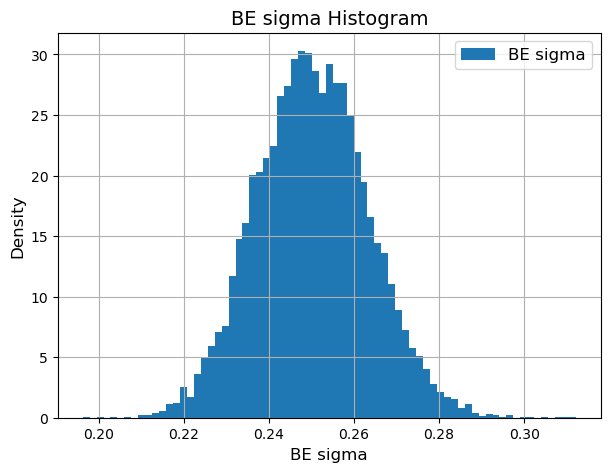

In [12]:
# Plot histogram of BE sigma
fig = plt.figure(figsize=(7, 5))
plt.title("BE sigma Histogram",fontsize = 14)
plt.xlabel("BE sigma", fontsize = 12)
plt.ylabel("Density", fontsize = 12)
plt.hist(sigma_BE, density=True, bins='auto', histtype='stepfilled', alpha=1, label = "BE sigma")
plt.legend(loc='best', fontsize = 12)
plt.grid()
plt.show()

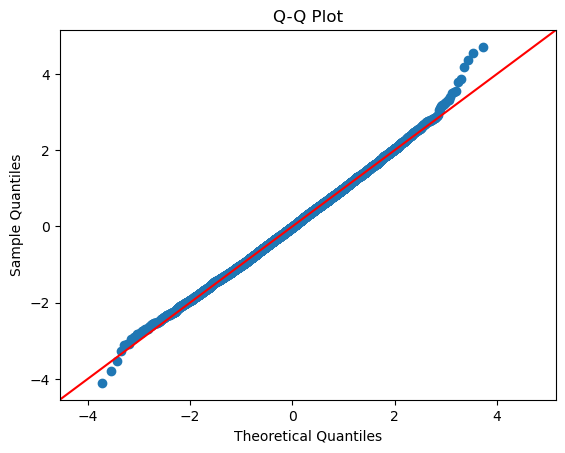

In [13]:
import statsmodels.api as sm

# Create a Q-Q plot
sm.qqplot(np.array(sigma_BE), line='45', fit=True)
plt.title('Q-Q Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

In [17]:
print("The mean of B/E volatility is", np.mean(sigma_BE))

The mean of B/E volatility is 0.25024271808092546


### Conclusion:

For 10k given paths of $S_{t}$ generated by $sigma = 0.25$, my computed corresponding B/E volatility are around 0.25 and does not follow normal distribution.

### <center>END<center>